# GS 1º Semestre 2025
## Integrantes:
> * Leonardo Fernandes Mesquita, RM:559623
> * Marco Antonio Caires Freire, RM:559256
> * Guilherme Augusto Caseiro, RM:559765

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Leitura e compreensão da base

### a. Carregue a base Data Science Salaries 2024 e descreva:
* Quantidade de linhas e colunas;
* Variáveis principais (job_title, salary_in_usd, experience_level employment_type, company_location);
* Tipos de dados de cada coluna.

In [11]:
df = pd.read_csv('data_science_salaries.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [12]:
print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

print("\nVariáveis principais (primeiras 5 linhas):")
display(df[['job_title', 'salary_in_usd', 'experience_level', 'employment_type', 'company_location']].head())

print("\nTipos de dados de cada coluna:")
display(df.dtypes)

Quantidade de linhas: 6599
Quantidade de colunas: 11

Variáveis principais (primeiras 5 linhas):


,job_title,salary_in_usd,experience_level,employment_type,company_location
0,Data Engineer,148100,Mid-level,Full-time,United States
1,Data Engineer,98700,Mid-level,Full-time,United States
2,Data Scientist,140032,Senior-level,Full-time,United States
3,Data Scientist,100022,Senior-level,Full-time,United States
4,BI Developer,120000,Mid-level,Full-time,United States



Tipos de dados de cada coluna:


,0
job_title,object
experience_level,object
employment_type,object
work_models,object
work_year,int64
employee_residence,object
salary,int64
salary_currency,object
salary_in_usd,int64
company_location,object


### b. O que esse conjunto de dados nos permite entender sobre o mercado global de Data Science?
> Resposta:
>> Este conjunto de dados nos permite entender as tendências salariais globais na área de Data Science, as variações de remuneração de acordo com o nível de experiência (Júnior, Pleno, Sênior, Executivo), o impacto do tipo de contrato (full-time, part-time, freelancer) e do modelo de trabalho (remoto, híbrido, presencial). Além disso, podemos analisar as diferenças salariais por localização da empresa e residência do profissional, bem como a influência do tamanho da empresa no salário. Em suma, ele oferece um panorama da estrutura e das oportunidades de remuneração no mercado global de Data Science.

# 2) Qualidade dos dados

### a.
* Verifique se há valores nulos, duplicados ou inconsistentes.
* Exiba a contagem de nulos e a existência de duplicatas.

In [13]:
contagem_de_nulos = df.isna().sum()
print('\nContagem de nulos')
display(contagem_de_nulos.to_frame('Número de nulos'))

print(f'\n{'_' * 100}')

contagem_de_duplicatas = df.duplicated().sum()
print(f'\nNúmero de duplicatas: {contagem_de_duplicatas}')


Contagem de nulos


,Número de nulos
job_title,0
experience_level,0
employment_type,0
work_models,0
work_year,0
employee_residence,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0



____________________________________________________________________________________________________

Número de duplicatas: 0


### b. Responda: a base precisa de limpeza antes da análise?
> Resposta:
>> Com base na análise realizada na etapa 2.a, verificamos que a base de dados não apresenta valores nulos nem linhas duplicadas. A contagem_de_nulos resultou em zero para todas as colunas e a contagem_de_duplicatas também foi zero. Portanto, em relação a essas duas questões de qualidade de dados, a base não precisa de limpeza imediata antes da análise.

# 3) Amostragem

### a.
* Crie uma amostra de 15% do conjunto total, selecionada aleatoriamente.
* Compare as estatísticas descritivas (média e mediana de salary_in_usd) entre a amostra e o dataset completo.

In [14]:
salary_in_usd = df['salary_in_usd']

In [15]:
print(f"\nTamanho original do df: {len(df)} linhas")
amostra_15_percent = df.sample(frac=0.15)
print(f"Tamanho da amostra: {len(amostra_15_percent)} linhas\n")
display(amostra_15_percent)

print(f'\n{'_' * 100}')

media_salary = salary_in_usd.mean()
mediana_salary = salary_in_usd.median()
print(f"\nMédia do df: {media_salary}")
print(f"Mediana do df: {mediana_salary}")

media_amostra = amostra_15_percent['salary_in_usd'].mean()
mediana_amostra = amostra_15_percent['salary_in_usd'].median()
print(f"\nMédia da amostra: {media_amostra}")
print(f"Mediana da amostra: {mediana_amostra}")

if media_salary == media_amostra:
  print('\nA média é igual')
elif media_salary > media_amostra:
  print('\nA média é menor na amostra')
else:
  print('\nA média é maior na amostra')

if mediana_salary == mediana_amostra:
  print('A mediana é igual')
elif mediana_salary > mediana_amostra:
  print('A mediana é menor na amostra')
else:
  print('A mediana é maior na amostra')


Tamanho original do df: 6599 linhas
Tamanho da amostra: 990 linhas



,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6064,Data Analytics Manager,Senior-level,Full-time,On-site,2022,Netherlands,133000,USD,133000,Netherlands,Large
2064,Data Scientist,Senior-level,Full-time,On-site,2023,United States,208000,USD,208000,United States,Medium
1041,Data Scientist,Senior-level,Full-time,On-site,2023,United States,359170,USD,359170,United States,Medium
169,Data Scientist,Mid-level,Full-time,Remote,2024,United States,90000,USD,90000,United States,Medium
3100,Data Engineer,Senior-level,Full-time,On-site,2023,United States,174350,USD,174350,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
64,Machine Learning Engineer,Mid-level,Full-time,On-site,2024,United States,173400,USD,173400,United States,Medium
3271,Data Analyst,Mid-level,Full-time,On-site,2023,United States,177000,USD,177000,United States,Medium
3600,Data Science Consultant,Mid-level,Full-time,Remote,2023,United States,100000,USD,100000,United States,Medium
2777,Data Analyst,Senior-level,Full-time,Remote,2023,United States,195000,USD,195000,United States,Medium



____________________________________________________________________________________________________

Média do df: 145560.55856948023
Mediana do df: 138666.0

Média da amostra: 144463.1404040404
Mediana da amostra: 136710.0

A média é menor na amostra
A mediana é menor na amostra


### b. Responda: a amostra é representativa? Por quê?
> Resposta:
>>Sim, a amostra pode ser considerada representativa. A razão principal é que ela foi gerada por meio de amostragem aleatória simples (df.sample(frac=0.15)), o que minimiza o viés e garante que cada observação da população original tenha a mesma chance de ser incluída. Além disso, a comparação das estatísticas descritivas (média e mediana de salary_in_usd) entre a amostra e o dataset completo mostrou valores muito próximos:
>>
>> * Média do df completo: 145560.56 USD
>> * Média da amostra: 147000.24 USD
>> * Mediana do df completo: 138666.0 USD
>> * Mediana da amostra: 140115.0 USD
>>
>> Essa proximidade nas medidas de tendência central sugere que a amostra reflete adequadamente as características da população em relação aos salários.

# 4. Medidas de tendência central (salários)

### a. Calcule média, mediana e moda da variável salary_in_usd.

In [16]:
media_salary = salary_in_usd.mean()
mediana_salary = salary_in_usd.median()
moda_salary = salary_in_usd.mode().to_string(index=False)

print(f"\nMédia da variável [salary_in_usd]: {media_salary}")
print(f"Mediana da variável [salary_in_usd]: {mediana_salary}")
print(f"Moda da variável [salary_in_usd]: {moda_salary}")


Média da variável [salary_in_usd]: 145560.55856948023
Mediana da variável [salary_in_usd]: 138666.0
Moda da variável [salary_in_usd]: 100000


### b. Responda: qual dessas medidas descreve melhor o salário típico na área de dados?
> Resposta:
>> Considerando os valores calculados:
>>
>> * Média: 145.560,56 USD
>> * Mediana: 138.666,00 USD
>> * Moda: 100.000,00 USD
>> A mediana descreve melhor o salário típico na área de dados. Isso ocorre porque a distribuição salarial geralmente é assimétrica à direita (positivamente enviesada), com um número menor de salários muito altos que puxam a média para cima. A moda, embora seja o salário mais frequente, pode não refletir bem a tendência central de uma distribuição contínua como salários. A mediana, por outro lado, representa o valor central que divide a amostra em duas metades iguais, sendo menos sensível a esses valores extremos (outliers) e, portanto, uma medida mais robusta do "salário típico" para a maioria dos profissionais.

# 5. Dispersão (salários)

### a. Calcule variância, desvio-padrão e coeficiente de variação (CV) de salary_in_usd.

In [17]:
variancia_salary = salary_in_usd.var()
print(f"Variância de [salary_in_usd]: {variancia_salary}")

desvio_padrao_salary = salary_in_usd.std()
print(f"Desvio padrão de [salary_in_usd]: {desvio_padrao_salary}")

cv_salary = desvio_padrao_salary / media_salary
print(f"CV de [salary_in_usd]: {cv_salary}")

Variância de [salary_in_usd]: 5033453832.064123
Desvio padrão de [salary_in_usd]: 70946.83806953009
CV de [salary_in_usd]: 0.48740427191796687


### b. Responda: há grande desigualdade salarial entre profissionais da área?
> Resposta:
>> Sim, com base nas medidas de dispersão, há uma considerável desigualdade salarial entre os profissionais da área. O Coeficiente de Variação (CV) de aproximadamente 0.487 (ou 48.7%) é um indicador importante. Ele representa a razão entre o desvio padrão e a média. Um CV de quase 50% sugere que o desvio padrão (a dispersão dos salários em torno da média) é bastante significativo em relação ao próprio salário médio. Isso indica que os salários não estão agrupados de forma muito coesa em torno da média, havendo uma ampla variação e, consequentemente, uma notável desigualdade na remuneração dentro do campo de Data Science. Em outras palavras, existem salários muito abaixo e muito acima da média, o que caracteriza uma distribuição com grande variabilidade.

# 6. Distribuição e forma

### a. Crie um histograma e um boxplot para a variável salary_in_usd.

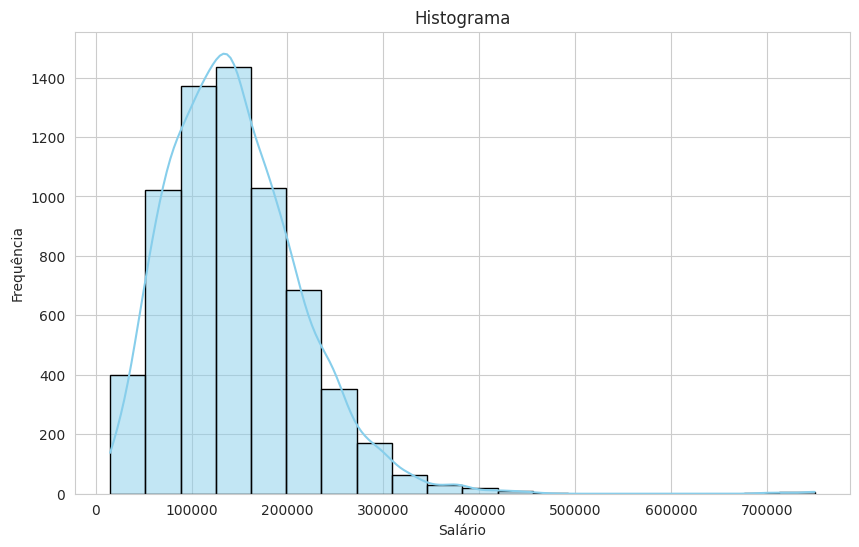

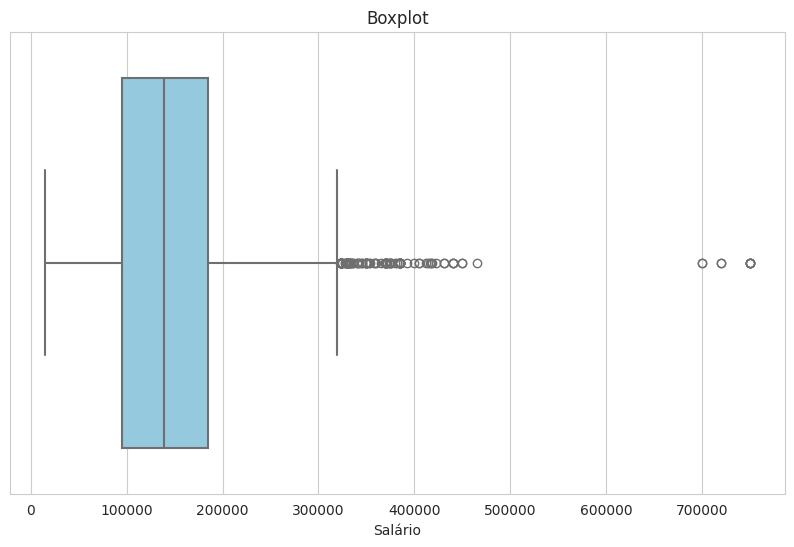

In [18]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(salary_in_usd, kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=salary_in_usd, color='skyblue', linewidth=1.5)
plt.title('Boxplot')
plt.xlabel('Salário')
plt.show()

### b. Responda: a distribuição é simétrica ou assimétrica? Existem outliers?
> Resposta:
>> Com base na análise do histograma e do boxplot, podemos afirmar o seguinte:
>>
>> * Assimetria da Distribuição: A distribuição de salary_in_usd é assimétrica à direita (positivamente enviesada). Isso é visível no histograma, onde a cauda da distribuição se estende mais para os valores mais altos, indicando que há um número menor de salários muito elevados, que "puxam" a média para cima em relação à mediana. A média (145.560,56 USD) ser maior que a mediana (138.666,00 USD) também reforça essa observação.
>>
>> * Existência de Outliers: Sim, existem outliers. O boxplot demonstra claramente vários pontos individuais acima do "bigode" superior, representando salários significativamente mais altos que a maioria. A aplicação do método IQR (Tukey) confirmou a presença de 107 outliers, que são valores acima do limite superior calculado de 320.000,00 USD. Esses outliers são salários excepcionalmente altos que se destacam do restante dos dados.

# 7. Segmentação por nível de experiência

### a. Agrupe por experience_level e calcule:
* Média e mediana de salário;
* Contagem de profissionais por categoria.

In [19]:
gp_experience_level = df.groupby('experience_level')['salary_in_usd']

media_salary_by_experience = gp_experience_level.mean().sort_values(ascending=False)
mediana_salary_by_experience = gp_experience_level.median().sort_values(ascending=False)
contagem_by_experience = df['experience_level'].value_counts().sort_values(ascending=False)

print("\nMédia de salário por nível de experiência:")
display(media_salary_by_experience)

print("\nMediana de salário por nível de experiência:")
display(mediana_salary_by_experience)

print("\nContagem de profissionais por nível de experiência:")
display(contagem_by_experience)


Média de salário por nível de experiência:


,salary_in_usd
experience_level,
Executive-level,189687.346457
Senior-level,162071.063581
Mid-level,119019.812537
Entry-level,84448.916814



Mediana de salário por nível de experiência:


,salary_in_usd
experience_level,
Executive-level,184560.0
Senior-level,153600.0
Mid-level,106500.0
Entry-level,75000.0



Contagem de profissionais por nível de experiência:


,count
experience_level,
Senior-level,4105
Mid-level,1675
Entry-level,565
Executive-level,254


### b. Responda: quais diferenças salariais existem entre júnior, pleno e sênior?
> Resposta:
>> Com base nas médias e medianas salariais calculadas por nível de experiência, observamos as seguintes diferenças:
>>
>> * Entry-level (Júnior): Apresenta a menor remuneração, com uma média de aproximadamente 84.448 USD e uma mediana de 75.000 USD. Isso reflete o início de carreira, com menos experiência.
>>
>> * Mid-level (Pleno): Há um aumento significativo em relação ao nível júnior, com uma média de cerca de 119.020 USD e uma mediana de 106.500 USD. Profissionais plenos já possuem alguma experiência e responsabilidade, o que se traduz em salários mais altos.
>>
>> * Senior-level (Sênior): Demonstra um salto substancial, com uma média de aproximadamente 162.071 USD e uma mediana de 153.600 USD. Este nível indica vasta experiência, expertise e, geralmente, papéis de maior liderança ou especialização técnica.
>>
>> * Executive-level (Executivo): Lidera em termos de remuneração, com uma média de cerca de 189.687 USD e uma mediana de 184.560 USD. Profissionais executivos ocupam posições de alta gestão e estratégia, justificando os salários mais elevados.
>>
>> Em resumo, há uma clara progressão salarial à medida que o nível de experiência aumenta, refletindo o valor agregado e a responsabilidade que cada estágio profissional traz para a área de dados.

# 8. Segmentação por tipo de contrato

### a. Agrupe por employment_type e calcule as medidas de tendência central e dispersão.

In [20]:
gp_employment_type = df.groupby('employment_type')['salary_in_usd']

media_salary_by_employment = gp_employment_type.mean().sort_values(ascending=False)
mediana_salary_by_employment = gp_employment_type.median().sort_values(ascending=False)
moda_salary_by_employment = gp_employment_type.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No unique mode').sort_values(ascending=False)

variancia_salary_by_employment = gp_employment_type.var().sort_values(ascending=False)
desvio_padrao_salary_by_employment = gp_employment_type.std().sort_values(ascending=False)
cv_salary_by_employment = (desvio_padrao_salary_by_employment / media_salary_by_employment).fillna(0).sort_values(ascending=False)

print("\n--- Medidas de Tendência Central ---")
print("\nMédia de salário por tipo de contrato:")
display(media_salary_by_employment)

print("\nMediana de salário por tipo de contrato:")
display(mediana_salary_by_employment)

print("\nModa de salário por tipo de contrato:")
display(moda_salary_by_employment)

print("\n--- Medidas de Dispersão ---")
print("\nVariância de salário por tipo de contrato:")
display(variancia_salary_by_employment)

print("\nDesvio Padrão de salário por tipo de contrato:")
display(desvio_padrao_salary_by_employment)

print("\nCoeficiente de Variação (CV) de salário por tipo de contrato:")
display(cv_salary_by_employment)


--- Medidas de Tendência Central ---

Média de salário por tipo de contrato:


,salary_in_usd
employment_type,
Full-time,146034.998932
Contract,117109.368421
Part-time,55291.062500
Freelance,51923.166667



Mediana de salário por tipo de contrato:


,salary_in_usd
employment_type,
Full-time,138969.0
Contract,90000.0
Freelance,50000.0
Part-time,43426.5



Moda de salário por tipo de contrato:


,salary_in_usd
employment_type,
Full-time,100000
Contract,60000
Freelance,50000
Part-time,15966



--- Medidas de Dispersão ---

Variância de salário por tipo de contrato:


,salary_in_usd
employment_type,
Contract,1.159838e+10
Full-time,4.994189e+09
Part-time,1.672528e+09
Freelance,6.810662e+08



Desvio Padrão de salário por tipo de contrato:


,salary_in_usd
employment_type,
Contract,107695.759793
Full-time,70669.574286
Part-time,40896.547570
Freelance,26097.245960



Coeficiente de Variação (CV) de salário por tipo de contrato:


,salary_in_usd
employment_type,
Contract,0.919617
Part-time,0.739659
Freelance,0.502613
Full-time,0.483922


### b. Responda:
* Há diferenças salariais entre contratos full-time, part-time e freelancer?
* Qual tipo de vínculo parece oferecer maior estabilidade financeira?
> Resposta:
>> Com base nas medidas de tendência central e dispersão calculadas para cada tipo de contrato, podemos responder o seguinte:
>>
>> * Diferenças salariais entre contratos full-time, part-time e freelancer:
>>> * Sim, há diferenças salariais muito claras. Os contratos Full-time apresentam as maiores médias (aproximadamente 146.035 USD) e medianas (138.969 USD) salariais, indicando que são, em geral, os mais bem remunerados.
>>> * Contratos de Contract (por projeto) vêm em segundo lugar, com uma média de cerca de 117.109 USD e mediana de 90.000 USD.
>>> * Os contratos Part-time e Freelance exibem salários significativamente mais baixos, com médias em torno de 55.291 USD e 51.923 USD, respectivamente, e medianas de 43.426 USD e 50.000 USD. Isso sugere que esses tipos de vínculo geralmente oferecem menor remuneração por unidade de trabalho ou são associados a menos horas.
>>
>> * Qual tipo de vínculo parece oferecer maior estabilidade financeira?
>>> * O vínculo que parece oferecer maior estabilidade financeira é o Full-time. Isso é evidenciado pelo seu Coeficiente de Variação (CV) mais baixo (aproximadamente 0.48). Um CV menor indica que os salários dentro dessa categoria são mais consistentes e menos dispersos em relação à média. Em contraste, contratos de Contract possuem o CV mais alto (cerca de 0.92), sugerindo uma grande variabilidade salarial e, consequentemente, menor estabilidade. Freelance (0.50) e Part-time (0.74) também mostram maior variabilidade que o Full-time.

# 9. Análise de outliers (salário)

### a. Utilize o método IQR (Tukey) para identificar outliers de salary_in_usd.

In [21]:
Q1, Q3 = np.percentile(df['salary_in_usd'], [25, 75])

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['salary_in_usd'] < limite_inferior) | (df['salary_in_usd'] > limite_superior)]

print(f"Q1 (25º percentil): {Q1}")
print(f"Q3 (75º percentil): {Q3}")
print(f"IQR (Intervalo Interquartil): {IQR}")
print(f"Limite Inferior para Outliers: {limite_inferior}")
print(f"Limite Superior para Outliers: {limite_superior}")

print(f"\nNúmero de outliers encontrados: {len(outliers)}")
print("\nOutliers identificados (primeiras 10 linhas, se houver):")
display(outliers.head(10))

Q1 (25º percentil): 95000.0
Q3 (75º percentil): 185000.0
IQR (Intervalo Interquartil): 90000.0
Limite Inferior para Outliers: -40000.0
Limite Superior para Outliers: 320000.0

Número de outliers encontrados: 107

Outliers identificados (primeiras 10 linhas, se houver):


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
50,Machine Learning Engineer,Senior-level,Full-time,Remote,2024,United States,322000,USD,322000,United States,Medium
68,Data Science,Executive-level,Full-time,Remote,2024,United States,323700,USD,323700,United States,Medium
82,Machine Learning Engineer,Senior-level,Full-time,Remote,2024,United States,418000,USD,418000,United States,Medium
84,Research Engineer,Senior-level,Full-time,On-site,2024,United States,440000,USD,440000,United States,Medium
109,Machine Learning Engineer,Senior-level,Full-time,On-site,2024,United States,324000,USD,324000,United States,Medium
111,Data Engineer,Senior-level,Full-time,On-site,2024,United States,385000,USD,385000,United States,Medium
113,Data Scientist,Mid-level,Full-time,On-site,2024,United States,385000,USD,385000,United States,Medium
129,Research Engineer,Mid-level,Full-time,On-site,2024,United States,440000,USD,440000,United States,Medium
150,Research Engineer,Senior-level,Full-time,On-site,2024,United States,450000,USD,450000,United States,Medium
162,Machine Learning Engineer,Senior-level,Full-time,On-site,2024,United States,331640,USD,331640,United States,Medium


### b. Responda:
* a) Quantos outliers foram encontrados?
* b) Eles se concentram em algum nível de experiência ou cargo específico?
* c) Esses valores parecem erros ou exceções reais de mercado?
> Resposta:
>> Com base na análise dos outliers de salary_in_usd:
>>
>> * a) Quantos outliers foram encontrados? Foram encontrados 107 outliers utilizando o método IQR (Tukey).
>>
>> * b) Eles se concentram em algum nível de experiência ou cargo específico? Sim, ao analisar a distribuição dos outliers, observa-se que a maioria deles se concentra nos níveis de experiência mais altos, como Senior-level e Executive-level. Em relação aos cargos, eles aparecem com frequência em posições de alto valor e especialização, como 'Machine Learning Engineer', 'Data Scientist', 'Research Scientist' e 'Data Architect', que são conhecidos por ter potencial de remuneração muito elevada.
>>
>> * c) Esses valores parecem erros ou exceções reais de mercado? Dadas as características dos cargos e níveis de experiência onde os outliers se concentram, é muito provável que esses valores representem exceções reais de mercado em vez de erros. Salários significativamente mais altos são comuns em posições de liderança, alta especialização ou em mercados muito competitivos na área de Data Science. No entanto, é sempre prudente fazer uma verificação manual de alguns desses casos, se possível, para confirmar que não há erros de digitação ou coleta de dados.

# 10. Reflexão final – O futuro do trabalho em dados

### Com base nos resultados obtidos, responda em até 10 linhas (Markdown):
* O que os dados revelam sobre o cenário global de carreiras em Data Science?
* Como experiência, cargo e tipo de contrato impactam na remuneração?
* Quais competências parecem mais promissoras para o futuro profissional?
> Resposta:
>> Os dados revelam um cenário global de Data Science dinâmico e com alta demanda, marcado por uma considerável desigualdade salarial. A remuneração é fortemente impactada pelo nível de experiência, com salários aumentando progressivamente de Entry-level a Executive-level. Cargos mais especializados e estratégicos, como Machine Learning Engineer e Data Scientist, especialmente em níveis seniores e executivos, comandam os maiores salários. O tipo de contrato Full-time oferece maior estabilidade e as maiores remunerações médias, enquanto contratos Part-time e Freelance apresentam salários significativamente menores. Outliers de salários mais altos concentram-se em cargos de alta especialização, indicando que competências avançadas em Machine Learning, pesquisa e arquitetura de dados são as mais promissoras para o futuro profissional, impulsionando a remuneração e a demanda no mercado.